# **Model Development Crime and Weather Dataset**
 ## **Problem Statement**
 Houston faces significant challenges with crime and public safety as a bustling metropolitan area. Global warming adds further complexity and unpredictable results. The project seeks to provide data-backed insights for law enforcement to address weather-related crime spikes and enhance public safety during extreme weather events. The project looks to optimize the crime rate prediction to a percentage error of 20% by integrating weather information.

* The aim of this research is to demonstrate a causal relationship between weather conditions and crime rates.
* The data was gathered from 2010 January 1 to 2023 August 31. 
* The dataset contains 4,991 rows and 73 columns
* Daily total crime number, Larceny/Theft Offenses, Assault Offenses, and Burglary/Breaking & Entering will be predict using Statsmodel VAR algorighm.
* Predicted values will be evaluated RMSE, MSE, MAE, and MAPE

* **Data source:** all_crime_features_2010_2023.csv

## **Import Module**

In [1]:
#### Import the libraries needed
import pickle
import dill
import json
import glob
import os
from pathlib import Path
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Set Environment**

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [3]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})

In [4]:
# Set default title color
plt.style.use('fivethirtyeight')
# Set default title color
plt.rcParams.update({'text.color': "#333333", 'axes.labelcolor': "#333333"})

# set default plt figure size
plt.rcParams["figure.figsize"] = [10, 5]
# figure suptitle
plt.rcParams["figure.titlesize"] = 26
plt.rcParams["figure.titleweight"] = "bold"
# set default plt font size
# plt.rcParams["font.size"] = 24
# font weight
# plt.rcParams["font.weight"] = "bold"
# title location
plt.rcParams["axes.titlelocation"] = "left"
# title size
plt.rcParams["axes.titlesize"] = 18
# title wight
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "normal"
# spines
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = True
# axis labels
# plt.rcParams["xaxis.labellocation"] = "left"
# plt.rcParams["yaxis.labellocation"] = "top"
plt.rcParams["axes.labelweight"] = "bold"
# tick
plt.rcParams['xtick.color'] = "#333333"
plt.rcParams['ytick.color'] = "#333333"
plt.rcParams["font.weight"] = "bold"

In [5]:
# Set up directory
working_directory = Path.cwd()
data_directory = working_directory/"data"
# data_directory = working_directory/"drive/MyDrive/Nigeria Enhancing Maternal Health/data/_data"

## **Load data**
* The dataset contains 4,991 rows and 73 columns

In [6]:
all_df = pd.read_csv(data_directory/'daily crime numbers and weather data for time series analysis_082003_ver2.csv', index_col='date', parse_dates=['date'])

In [7]:
all_df.head()

,Kidnapping/Abduction,"Sex Offenses, Forcible",Robbery,Assault Offenses,Arson,Extortion/Blackmail,Burglary/Breaking & Entering,Larceny/Theft Offenses,Motor Vehicle Theft,Counterfeiting/Forgery,Fraud Offenses,Embezzlement,Stolen Property Offenses,Destruction/Damage/Vandalism of Property,Drug/Narcotic Offenses,"Sex Offenses, Nonforcible",Pornography/Obscene Material,Gambling Offenses,Prostitution Offenses,Bribery,Weapon Law Violations,Human Trafficking or Kidnapping/Abduction,Animal Cruelty,Homicide Offenses,Bad Checks,Curfew/Loitering/Vagrancy Violations,Disorderly Conduct,Driving Under the Influence,Drunkenness,"Family Offenses, Nonviolent",Liquor Law Violations,Peeping Tom,Runaway,Trespass of Real Property,All Other Offenses,Offense Count,week,month,year,mon_year,season,is_holiday,is_weekend,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,13.0,31.0,58.0,0.0,0.0,77.0,215.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,416.0,Friday,1,2010,Jan-2010,Winter,1,0,53.9,41.3,46.9,53.9,33.0,42.3,34.0,63.0,0.0,0,0.0,none,0.0,0.0,27.8,18.0,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,07:16:59,17:33:24,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-02,0.0,2.0,32.0,15.0,0.0,0.0,67.0,200.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,344.0,Saturday,1,2010,Jan-2010,Winter,0,1,53.7,40.1,46.3,53.7,34.9,43.1,30.9,56.9,0.0,0,0.0,none,0.0,0.0,16.1,11.6,93.7,1025.9,9.1,9.6,156.6,13.4,6.0,07:17:13,17:34:07,0.57,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-03,0.0,0.0,38.0,35.0,0.0,0.0,52.0,179.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339.0,Sunday,1,2010,Jan-2010,Winter,0,1,47.4,41.1,44.8,46.5,33.8,40.8,35.6,70.2,0.0,0,0.0,none,0.0,0.0,18.3,13.4,55.4,1023.2,78.6,8.8,80.2,6.7,3.0,07:17:25,17:34:50,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-04,0.0,1.0,24.0,25.0,0.0,0.0,94.0,211.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384.0,Monday,1,2010,Jan-2010,Winter,0,0,46.4,36.2,41.8,42.1,28.7,35.2,29.4,62.0,0.0,0,0.0,none,0.0,0.0,25.0,18.4,346.2,1028.6,47.6,9.6,167.4,14.5,7.0,07:17:35,17:35:35,0.64,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-05,0.0,3.0,19.0,22.0,0.0,0.0,88.0,183.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,Tuesday,1,2010,Jan-2010,Winter,0,0,48.2,31.7,38.7,47.5,24.0,34.3,23.6,56.1,0.0,0,0.0,none,0.0,0.0,16.1,9.8,22.5,1029.7,4.4,9.8,174.1,15.0,7.0,07:17:44,17:36:20,0.67,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"


In [8]:
all_df.tail(3)

,Kidnapping/Abduction,"Sex Offenses, Forcible",Robbery,Assault Offenses,Arson,Extortion/Blackmail,Burglary/Breaking & Entering,Larceny/Theft Offenses,Motor Vehicle Theft,Counterfeiting/Forgery,Fraud Offenses,Embezzlement,Stolen Property Offenses,Destruction/Damage/Vandalism of Property,Drug/Narcotic Offenses,"Sex Offenses, Nonforcible",Pornography/Obscene Material,Gambling Offenses,Prostitution Offenses,Bribery,Weapon Law Violations,Human Trafficking or Kidnapping/Abduction,Animal Cruelty,Homicide Offenses,Bad Checks,Curfew/Loitering/Vagrancy Violations,Disorderly Conduct,Driving Under the Influence,Drunkenness,"Family Offenses, Nonviolent",Liquor Law Violations,Peeping Tom,Runaway,Trespass of Real Property,All Other Offenses,Offense Count,week,month,year,mon_year,season,is_holiday,is_weekend,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-08-29,1.0,6.0,18.0,145.0,0.0,0.0,37.0,159.0,47.0,8.0,20.0,2.0,2.0,51.0,23.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,0.0,0.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,27.0,52.0,624.0,Tuesday,8,2023,Aug-2023,Summer,0,0,93.8,79.7,87.2,92.6,79.7,88.7,64.3,49.2,0.0,0,0.0,none,0.0,0.0,31.3,19.6,33.0,1010.1,32.5,9.9,165.8,14.2,9.0,2023-08-29T06:56:57,2023-08-29T19:47:31,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960,D0326"
2023-08-30,0.0,1.0,20.0,164.0,0.0,2.0,36.0,137.0,46.0,4.0,10.0,1.0,1.0,37.0,22.0,0.0,2.0,0.0,11.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,0.0,4.0,0.0,0.0,0.0,22.0,54.0,590.0,Wednesday,8,2023,Aug-2023,Summer,0,0,96.7,78.0,87.4,95.0,78.0,86.5,57.1,37.4,0.0,0,0.0,none,0.0,0.0,30.1,15.2,35.9,1009.9,15.9,9.9,195.6,16.9,9.0,2023-08-30T06:57:30,2023-08-30T19:46:22,0.50,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960,D0326"
2023-08-31,0.0,6.0,14.0,148.0,2.0,2.0,20.0,140.0,52.0,4.0,9.0,1.0,2.0,55.0,25.0,0.0,2.0,0.0,1.0,0.0,14.0,0.0,1.0,2.0,0.0,0.0,3.0,8.0,0.0,2.0,0.0,0.0,0.0,20.0,35.0,568.0,Thursday,8,2023,Aug-2023,Summer,0,0,97.1,80.2,87.6,95.0,80.7,87.5,59.6,40.8,0.0,0,0.0,none,0.0,0.0,23.0,12.5,69.9,1010.9,24.2,9.8,181.2,15.8,9.0,2023-08-31T06:58:02,2023-08-31T19:45:13,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960,D0326"


In [9]:
all_df.shape

(4991, 73)

In [10]:
# Check columns
num_cols = all_df.select_dtypes(include=[np.number]).columns
print(f"Numerical Columns: {num_cols}")
print()

cat_cols = all_df.select_dtypes(include=object).columns
print(f"Categorical Columns: {cat_cols}")

Numerical Columns: Index(['Kidnapping/Abduction', 'Sex Offenses, Forcible', 'Robbery',
       'Assault Offenses', 'Arson', 'Extortion/Blackmail',
       'Burglary/Breaking & Entering', 'Larceny/Theft Offenses',
       'Motor Vehicle Theft', 'Counterfeiting/Forgery', 'Fraud Offenses',
       'Embezzlement', 'Stolen Property Offenses',
       'Destruction/Damage/Vandalism of Property', 'Drug/Narcotic Offenses',
       'Sex Offenses, Nonforcible', 'Pornography/Obscene Material',
       'Gambling Offenses', 'Prostitution Offenses', 'Bribery',
       'Weapon Law Violations', 'Human Trafficking or Kidnapping/Abduction',
       'Animal Cruelty', 'Homicide Offenses', 'Bad Checks',
       'Curfew/Loitering/Vagrancy Violations', 'Disorderly Conduct',
       'Driving Under the Influence', 'Drunkenness',
       'Family Offenses, Nonviolent', 'Liquor Law Violations', 'Peeping Tom',
       'Runaway', 'Trespass of Real Property', 'All Other Offenses',
       'Offense Count', 'month', 'year', 'is_holi

In [11]:
# Sort value in a chronological order
all_df.sort_index(inplace=True)

##### --Restore Point--

In [12]:
crime_df = all_df.loc[:, :'is_weekend']
temp_df = all_df.loc[:, 'week':]
crime_df.head()

,Kidnapping/Abduction,"Sex Offenses, Forcible",Robbery,Assault Offenses,Arson,Extortion/Blackmail,Burglary/Breaking & Entering,Larceny/Theft Offenses,Motor Vehicle Theft,Counterfeiting/Forgery,Fraud Offenses,Embezzlement,Stolen Property Offenses,Destruction/Damage/Vandalism of Property,Drug/Narcotic Offenses,"Sex Offenses, Nonforcible",Pornography/Obscene Material,Gambling Offenses,Prostitution Offenses,Bribery,Weapon Law Violations,Human Trafficking or Kidnapping/Abduction,Animal Cruelty,Homicide Offenses,Bad Checks,Curfew/Loitering/Vagrancy Violations,Disorderly Conduct,Driving Under the Influence,Drunkenness,"Family Offenses, Nonviolent",Liquor Law Violations,Peeping Tom,Runaway,Trespass of Real Property,All Other Offenses,Offense Count,week,month,year,mon_year,season,is_holiday,is_weekend
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,13.0,31.0,58.0,0.0,0.0,77.0,215.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,416.0,Friday,1,2010,Jan-2010,Winter,1,0
2010-01-02,0.0,2.0,32.0,15.0,0.0,0.0,67.0,200.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,344.0,Saturday,1,2010,Jan-2010,Winter,0,1
2010-01-03,0.0,0.0,38.0,35.0,0.0,0.0,52.0,179.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339.0,Sunday,1,2010,Jan-2010,Winter,0,1
2010-01-04,0.0,1.0,24.0,25.0,0.0,0.0,94.0,211.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384.0,Monday,1,2010,Jan-2010,Winter,0,0
2010-01-05,0.0,3.0,19.0,22.0,0.0,0.0,88.0,183.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,Tuesday,1,2010,Jan-2010,Winter,0,0


In [13]:
temp_df.head()

,week,month,year,mon_year,season,is_holiday,is_weekend,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Friday,1,2010,Jan-2010,Winter,1,0,53.9,41.3,46.9,53.9,33.0,42.3,34.0,63.0,0.0,0,0.0,none,0.0,0.0,27.8,18.0,359.3,1028.0,47.7,9.8,174.8,15.0,7.0,07:16:59,17:33:24,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-02,Saturday,1,2010,Jan-2010,Winter,0,1,53.7,40.1,46.3,53.7,34.9,43.1,30.9,56.9,0.0,0,0.0,none,0.0,0.0,16.1,11.6,93.7,1025.9,9.1,9.6,156.6,13.4,6.0,07:17:13,17:34:07,0.57,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-03,Sunday,1,2010,Jan-2010,Winter,0,1,47.4,41.1,44.8,46.5,33.8,40.8,35.6,70.2,0.0,0,0.0,none,0.0,0.0,18.3,13.4,55.4,1023.2,78.6,8.8,80.2,6.7,3.0,07:17:25,17:34:50,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-04,Monday,1,2010,Jan-2010,Winter,0,0,46.4,36.2,41.8,42.1,28.7,35.2,29.4,62.0,0.0,0,0.0,none,0.0,0.0,25.0,18.4,346.2,1028.6,47.6,9.6,167.4,14.5,7.0,07:17:35,17:35:35,0.64,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"
2010-01-05,Tuesday,1,2010,Jan-2010,Winter,0,0,48.2,31.7,38.7,47.5,24.0,34.3,23.6,56.1,0.0,0,0.0,none,0.0,0.0,16.1,9.8,22.5,1029.7,4.4,9.8,174.1,15.0,7.0,07:17:44,17:36:20,0.67,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,72243012960"


In [14]:
# Check total crime counds by crime type, Extract total and top 3 crime type
total_crime = crime_df.loc[:, :'Offense Count'].sum(axis=0).sort_values(ascending=False)[:4]
print("Total and Top 6 Crime Type")
total_crime

Total and Top 6 Crime Type


Offense Count                   2374626.0
Larceny/Theft Offenses           940190.0
Assault Offenses                 439876.0
Burglary/Breaking & Entering     264844.0
dtype: float64

In [15]:
# Extract crime_cols
crime_cols = total_crime.index

## **Visualize Some Features**

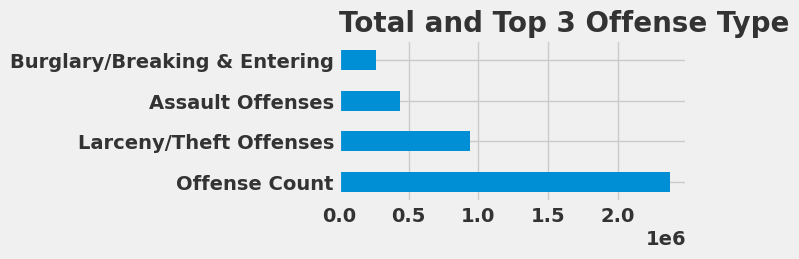

In [71]:
# Plot overall total and top 3 crime counts by crime type
fig, ax = plt.subplots(figsize=(4, 2))
plt.title("Total and Top 3 Offense Type", fontsize=20, fontweight='bold')
total_crime.plot(kind='barh');

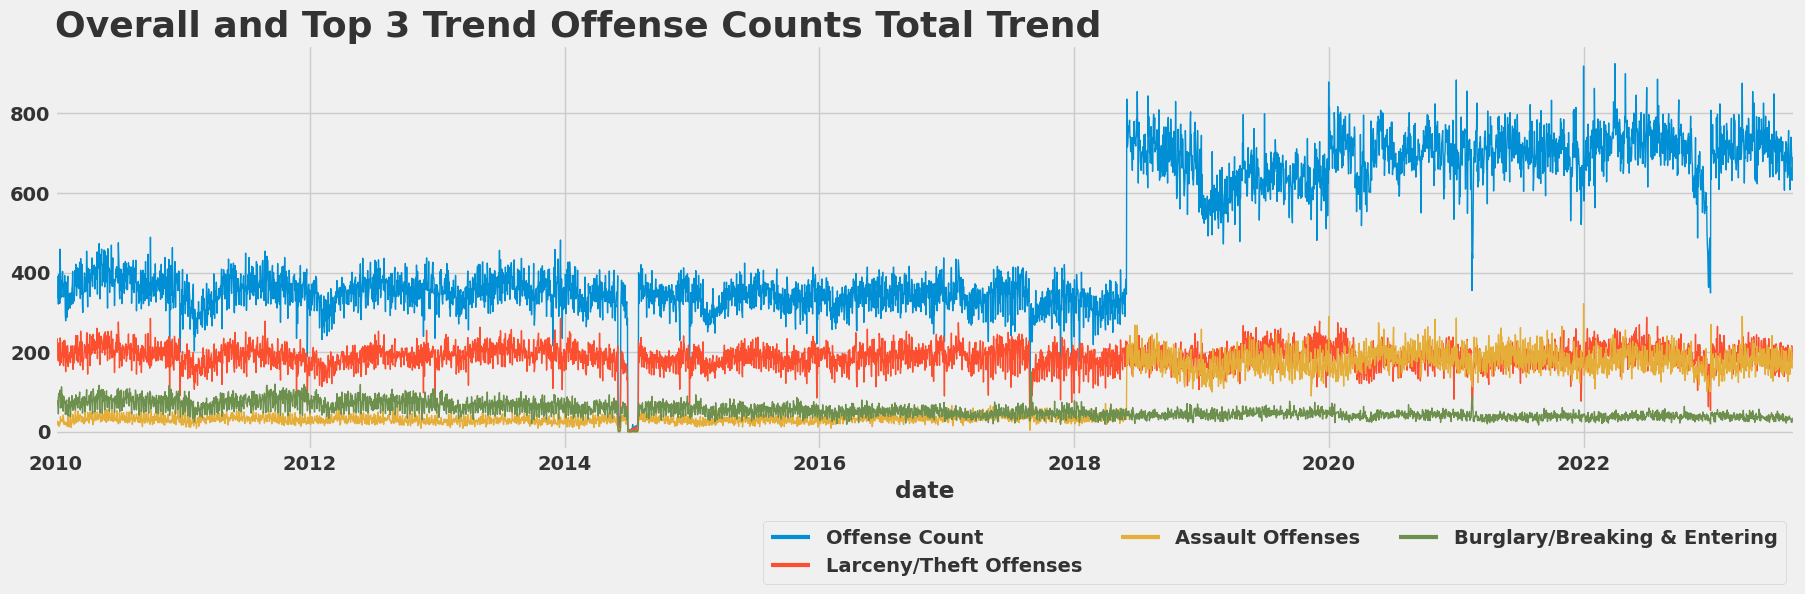

In [17]:
# Plot Total and top 3 crime counts by crime type
fig, ax = plt.subplots(figsize=(20, 5))

plt.title("Overall and Top 3 Trend Offense Counts Total Trend", fontsize=26, fontweight='bold')
for col in total_crime.index:
    bar = crime_df[col].plot(label=col, lw=1)
    # bar.text(s=col, x=crime_df.index[-1], y=crime_df[col][-1])
leg = plt.legend(frameon=True, ncol=3, bbox_to_anchor=(1, -0.15)); #loc='lower center', 
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(3)

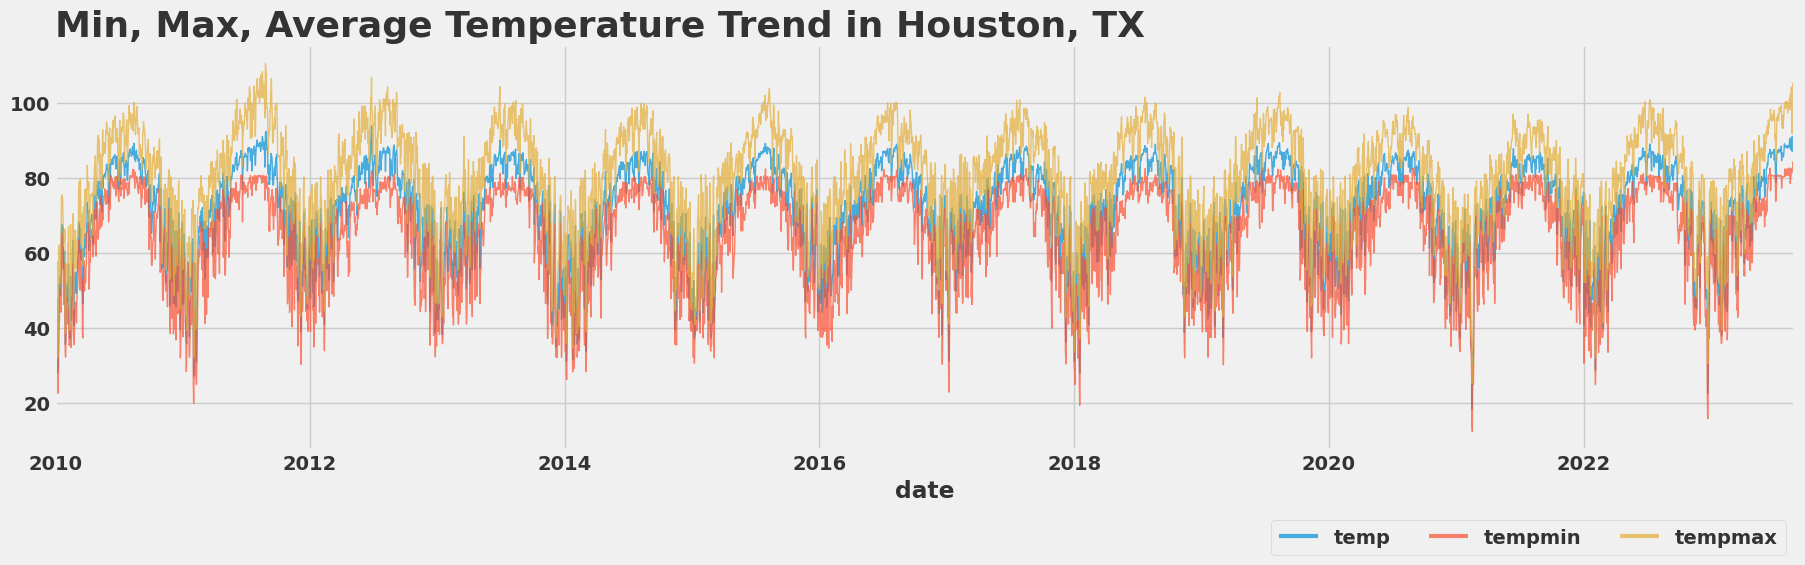

In [18]:
# Plot Total and top 6 crime counts by crime type
fig, ax = plt.subplots(figsize=(20, 5))
plt.title("Min, Max, Average Temperature Trend in Houston, TX", fontsize=26, fontweight='bold')
temp_cols_to_plot = ['temp', 'tempmin', 'tempmax']
for col in temp_cols_to_plot:
    bar = temp_df[col].plot(label=col, lw=1, alpha=.7)
    # bar.text(s=col, x=crime_df.index[-1], y=crime_df[col][-1])
leg = plt.legend(labels=['Average', 'Min', 'Max'], frameon=True, ncol=3, bbox_to_anchor=(1, -0.15))
leg = plt.legend(frameon=True, ncol=3, bbox_to_anchor=(1, -0.15)); #loc='lower center', 

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(3);

## **Multivariate Timeseries Prediction** 
1. Conduct Augmented Dickey-Fuller Test (ADF)
    * All temperature related features are stationary ['tempmax','tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase'] 
2. Conduct Granger’s Causality Test
3. Feature Selection
4. Model Creation




* ARIMAX model with exogenous variable 
* VAR (Vector Auto-Regressive) 
* Random Forest Regressor, XGB Regressor
* LSTM

In [19]:
# from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.api import VAR
# from pmdarima.arima.utils import ndiffs
# from pmdarima import auto_arima
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

### Conduct Augmented Dickey-Fuller Test to check Stationality
* For a VAR model to predict more accurately, timeseries should be stational.
* Before creating a model, ADF test needs to be conducted
* If a timeseries is not stational, it has to be lagged until it becomes stational
    * Null Hypothesis (H0): Time series is NOT stational
    * Alternative Hypothesis (HA): Time series is stational

* The result of ADF test indicates 'Offense Count', 'Assault Offenses', and 'Destruction/Damage/Vandalism of Property' are not stationary
* Take 1 day lag of those 3 features 

In [20]:
# Function to return ADF result
def adf_test(df, col):
    from statsmodels.tsa.stattools import adfuller
    adf_results = adfuller(df[col])
    adf_statistics = {}
    adf_statistics['Test Statistic'] = adf_results[0]
    adf_statistics['p-value'] = adf_results[1]
    adf_statistics['Critical Value (1%)'] = adf_results[4]['1%']
    adf_statistics['Critical Value (5%)'] = adf_results[4]['5%']
    adf_statistics['Critical Value (10%)'] = adf_results[4]['10%']
    return adf_statistics

# Fnction to determine whether the feature is stational or not
def is_stationary(adf_stats):
    return (adf_stats['p-value'] < 0.05) & (adf_stats['Test Statistic'] < adf_stats['Critical Value (1%)']) & (adf_stats['Test Statistic'] < adf_stats['Critical Value (5%)']) & (adf_stats['Test Statistic'] < adf_stats['Critical Value (10%)'])

# Function to display the ADF results
def display_adf(df, col):
    adf_statistics = adf_test(df, col)

    test_statistic = adf_statistics['Test Statistic']
    p_value = adf_statistics['p-value']
    critical_value_1 = adf_statistics['Critical Value (1%)']
    critical_value_5 = adf_statistics['Critical Value (5%)']
    critical_value_10 = adf_statistics['Critical Value (10%)']

    print(f"---- ADF Test Result: {col} ----")
    if is_stationary(adf_statistics):
        print(f"{col} --> Stationary")
        print(f"Test statistic: {test_statistic:.4f}")
        print(f"p-values: {p_value:.4f}")
        print(f"Critical value (1%): {critical_value_1:.4f}")
        print(f"Critical value (5%): {critical_value_5:.4f}")
        print(f"Critical value (10%): {critical_value_10:.4f}")
        print()
    else:
        print(f"{col} --> NOT Stationary ***")
        print(f"Test statistic: {test_statistic:.4f}")
        print(f"p-values: {p_value:.4f}")
        print()

* 'Offense Count', 'Assault Offenses', 'Burglary/Breaking & Entering', 'solarradiation', and 'solarenergy' are not stationary
* These columns need to be differenciated

In [21]:
# Run ADF test against crime_cols
for col in crime_cols:
    display_adf(crime_df, col)

---- ADF Test Result: Offense Count ----
Offense Count --> NOT Stationary ***
Test statistic: -1.8771
p-values: 0.3429

---- ADF Test Result: Larceny/Theft Offenses ----
Larceny/Theft Offenses --> Stationary
Test statistic: -7.2905
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671



---- ADF Test Result: Assault Offenses ----
Assault Offenses --> NOT Stationary ***
Test statistic: -1.1380
p-values: 0.6997

---- ADF Test Result: Burglary/Breaking & Entering ----
Burglary/Breaking & Entering --> NOT Stationary ***
Test statistic: -3.2164
p-values: 0.0191



In [22]:
temp_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
             'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
             'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 
             'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 
             'solarenergy', 'uvindex', 'moonphase']

In [23]:
# Run ADF test against temp_cols
for col in temp_cols:
    display_adf(temp_df, col)

---- ADF Test Result: tempmax ----
tempmax --> Stationary
Test statistic: -5.1595
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: tempmin ----
tempmin --> Stationary
Test statistic: -5.2014
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: temp ----
temp --> Stationary
Test statistic: -4.9960
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: feelslikemax ----
feelslikemax --> Stationary
Test statistic: -4.8984
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: feelslikemin ----
feelslikemin --> Stationary
Test statistic: -4.1871
p-values: 0.0007
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: feelslike ----
feelslike

### Transform Features - Differencing

* Lag 'Offense Count', 'Assault Offenses', and 'Burglary/Breaking & Entering'

In [24]:
# Take lag of these columns
crime_cols_to_be_lagged = ['Offense Count', 'Assault Offenses', 'Burglary/Breaking & Entering'] 

lagged_crime_df = crime_df[crime_cols_to_be_lagged].diff()
lagged_crime_df.columns = ['lagged_Offense Count',  'lagged_Assault Offenses', 'lagged_Burglary/Breaking & Entering'] 

In [25]:
lagged_df =lagged_crime_df.copy()
lagged_df. head()

,lagged_Offense Count,lagged_Assault Offenses,lagged_Burglary/Breaking & Entering
date,,,
2010-01-01,NaN,NaN,NaN
2010-01-02,-72.0,-43.0,-10.0
2010-01-03,-5.0,20.0,-15.0
2010-01-04,45.0,-10.0,42.0
2010-01-05,-47.0,-3.0,-6.0


In [26]:
# Concatenate lagged_df and all_df, and remove ['Offense Count',  'Assault Offenses', 'Destruction/Damage/Vandalism of Property'] 
lagged_df = pd.concat([lagged_df, crime_df[crime_cols], temp_df[temp_cols]], axis=1)

In [27]:
# Remove the row whose index is '2010-01-01'
lagged_df.drop(index='2010-01-01', inplace=True)

In [28]:
# Remove the columns 'Offense Count', 'Assault Offenses', 'Destruction/Damage/Vandalism of Property', 'solarradiation', 'solarenergy'
lagged_df.drop(labels=['Offense Count', 'Assault Offenses', 'Burglary/Breaking & Entering'], axis=1, inplace=True)

In [29]:
lagged_df.head(3)

,lagged_Offense Count,lagged_Assault Offenses,lagged_Burglary/Breaking & Entering,Larceny/Theft Offenses,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02,-72.0,-43.0,-10.0,200.0,53.7,40.1,46.3,53.7,34.9,43.1,30.9,56.9,0.0,0,0.0,0.0,0.0,16.1,11.6,93.7,1025.9,9.1,9.6,156.6,13.4,6.0,0.57
2010-01-03,-5.0,20.0,-15.0,179.0,47.4,41.1,44.8,46.5,33.8,40.8,35.6,70.2,0.0,0,0.0,0.0,0.0,18.3,13.4,55.4,1023.2,78.6,8.8,80.2,6.7,3.0,0.60
2010-01-04,45.0,-10.0,42.0,211.0,46.4,36.2,41.8,42.1,28.7,35.2,29.4,62.0,0.0,0,0.0,0.0,0.0,25.0,18.4,346.2,1028.6,47.6,9.6,167.4,14.5,7.0,0.64


* Run ADF Test again to see whether 'lagged_Offense Count',  'lagged_Assault Offenses', 'lagged_Burglary/Breaking & Entering' are stationary

In [30]:
# Run ADF test against lagged_df
# for col in lagged_df[1:]['lagged_Offense Count',  'lagged_Assault Offenses', 'lagged_Burglary/Breaking & Entering']:
for col in ['lagged_Offense Count',  'lagged_Assault Offenses', 'lagged_Burglary/Breaking & Entering']:
    display_adf(lagged_df[1:], col)

---- ADF Test Result: lagged_Offense Count ----
lagged_Offense Count --> Stationary
Test statistic: -15.7224
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: lagged_Assault Offenses ----
lagged_Assault Offenses --> Stationary
Test statistic: -15.4721
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671

---- ADF Test Result: lagged_Burglary/Breaking & Entering ----
lagged_Burglary/Breaking & Entering --> Stationary
Test statistic: -18.6528
p-values: 0.0000
Critical value (1%): -3.4317
Critical value (5%): -2.8621
Critical value (10%): -2.5671



## **Save lagged_df**

In [31]:
# Save lagged_df into csv for a KATS model
lagged_df.reset_index(names='date').to_csv(data_directory/'lagged_timeseries.csv', index=False)

### Conduct Granger’s Causality Test to ientify the relationship between variables
* Identify the relationship between variables: x causes y
    * Null Hypothesis (H0): Time series x does not Granger-cause time series y 
    * Alternative Hypothesis (HA): Time series x Granger-causes time series y

In [32]:
# Function to return Granger's Causality Test result
def granger_causality_test(df, col1, col2, max_lag=1):
    from statsmodels.tsa.stattools import grangercausalitytests
    granger_results = grangercausalitytests(df[[col1, col2]], maxlag=max_lag, verbose=False)
    granger_statistics = {}
    granger_statistics['Causality'] = (col1, col2) 
    granger_statistics['p-value'] = round(granger_results[1][0]['ssr_ftest'][1], 4)
    return granger_statistics

# Fnction to determine whether col2 causes cal1
def is_col2_causes_col1(granger_stats):
    return (granger_stats['p-value'] < 0.05)

# Function to display the Granger's Causality results
def display_granger_causality_test(df, col1, col2):
    granger_statistics = granger_causality_test(df, col1, col2)
    p_value = granger_statistics['p-value']

    print(f"---- Granger's Causality Test Result: {col1} & {col2} ----")
    if is_col2_causes_col1(granger_statistics):
        print(f"{col1} --> Causes {col2}")
        print(f"p-values: {p_value:.4f}")
        print()
    else:
        print(f"{col1} --> DOESN'T Cause {col2} ***")
        print(f"p-values: {p_value:.4f}")
        print()

* 'Offense Count', 'Assault Offenses', 'Burglary/Breaking & Entering', 'solarradiation', and 'solarenergy' are not stationary
* These columns need to be differenciated

In [33]:
lagged_crime_cols = ['lagged_Offense Count', 'lagged_Assault Offenses', 'lagged_Burglary/Breaking & Entering', 'Larceny/Theft Offenses']
lagged_temp_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 
                    'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 
                    'cloudcover', 'visibility', 'uvindex', 'moonphase', 'solarradiation', 'solarenergy',]

# Run Granger's Causality test against crime_cols and temp_cols
result_granger_causality = []
results = []
for i in range(len(lagged_temp_cols)):
    for j in range(len(lagged_crime_cols)):
        result = granger_causality_test(lagged_df, lagged_temp_cols[i], lagged_crime_cols[j])
        # result = granger_causality_test(standardized_lagged_df, lagged_temp_cols[i], lagged_crime_cols[j])
        results.append(result)
        result_granger_causality.append(is_col2_causes_col1(result))

In [34]:
# Conert results to a dataframe for convenience
results_df = pd.DataFrame(results)
causing = [t[0] for t in results_df['Causality']]
caused = [t[1] for t in results_df['Causality']]

results_df['causing'] = causing 
results_df['caused'] = caused
results_df.drop('Causality', axis=1, inplace=True)

sorted_results = results_df.sort_values(['caused', 'p-value'])

In [35]:
# Check the combinations and p-values
for val in sorted_results['caused'].unique():
    print(f"{val} & Weather related features")
    print(sorted_results[sorted_results['caused'] == val].head())
    print()

Larceny/Theft Offenses & Weather related features
    p-value   causing                  caused
47   0.0180      snow  Larceny/Theft Offenses
55   0.0546  windgust  Larceny/Theft Offenses
63   0.1003   winddir  Larceny/Theft Offenses
7    0.1342   tempmin  Larceny/Theft Offenses
11   0.1410      temp  Larceny/Theft Offenses

lagged_Assault Offenses & Weather related features
    p-value         causing                   caused
25   0.0009             dew  lagged_Assault Offenses
85   0.0017  solarradiation  lagged_Assault Offenses
89   0.0017     solarenergy  lagged_Assault Offenses
5    0.0080         tempmin  lagged_Assault Offenses
1    0.0119         tempmax  lagged_Assault Offenses

lagged_Burglary/Breaking & Entering & Weather related features
    p-value    causing                               caused
46   0.0353       snow  lagged_Burglary/Breaking & Entering
58   0.1452  windspeed  lagged_Burglary/Breaking & Entering
62   0.2739    winddir  lagged_Burglary/Breaking & Entering


### Train and Test Data Preparation

In [36]:
# Split df_final into train and test
steps = 31
num_train = int(len(lagged_df) - steps)

train = lagged_df[:num_train]
test = lagged_df[num_train:]

In [37]:
train.tail()

,lagged_Offense Count,lagged_Assault Offenses,lagged_Burglary/Breaking & Entering,Larceny/Theft Offenses,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-27,-46.0,-35.0,-19.0,215.0,93.2,80.3,86.0,97.3,85.5,91.7,72.0,64.9,0.000,0,0.00,0.0,0.0,22.2,18.2,155.1,1017.0,18.2,9.3,127.1,10.7,8.0,0.33
2023-07-28,7.0,16.0,16.0,205.0,95.0,80.2,85.6,99.0,84.6,90.4,70.8,63.3,0.026,100,4.17,0.0,0.0,24.2,17.4,155.9,1017.5,33.8,9.6,168.0,14.5,9.0,0.36
2023-07-29,3.0,46.0,-10.0,177.0,95.8,80.3,86.2,100.1,85.3,91.9,71.9,64.7,0.000,0,0.00,0.0,0.0,23.0,19.9,172.1,1018.5,46.7,9.7,199.7,17.1,10.0,0.40
2023-07-30,-32.0,-4.0,-5.0,139.0,98.4,80.4,87.5,102.9,85.7,94.0,72.8,64.4,0.000,0,0.00,0.0,0.0,20.8,15.5,198.8,1017.5,29.4,9.9,221.6,19.1,9.0,0.43
2023-07-31,-54.0,-27.0,6.0,141.0,100.0,80.5,89.1,105.7,86.1,95.5,72.0,60.2,0.000,0,0.00,0.0,0.0,18.3,15.6,200.5,1016.3,39.0,9.9,197.5,17.0,9.0,0.46


In [38]:
test.head()

,lagged_Offense Count,lagged_Assault Offenses,lagged_Burglary/Breaking & Entering,Larceny/Theft Offenses,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-08-01,95.0,-16.0,-6.0,209.0,99.6,82.4,88.7,106.5,89.6,96.6,73.4,63.0,0.0,0,0.0,0.0,0.0,21.9,14.4,193.8,1016.5,38.6,9.9,186.7,16.2,9.0,0.50
2023-08-02,1.0,-6.0,2.0,194.0,98.9,80.4,88.4,102.4,85.7,94.4,71.6,61.2,0.0,0,0.0,0.0,0.0,23.0,17.6,164.5,1016.4,21.5,9.9,217.7,18.6,9.0,0.53
2023-08-03,-49.0,1.0,-1.0,193.0,98.5,82.2,88.1,107.2,90.5,96.8,74.7,66.7,0.0,0,0.0,0.0,0.0,31.7,19.7,174.1,1015.3,19.6,9.9,202.8,17.5,10.0,0.57
2023-08-04,75.0,9.0,10.0,212.0,100.4,82.3,88.4,106.7,90.7,97.0,74.3,65.8,0.0,0,0.0,0.0,0.0,30.0,23.1,191.5,1013.9,26.5,9.9,206.0,17.8,9.0,0.60
2023-08-05,-2.0,42.0,-17.0,185.0,99.7,80.7,88.3,106.2,87.4,96.8,74.4,66.3,0.0,0,0.0,0.0,0.0,27.7,20.7,195.1,1014.3,25.4,9.8,202.2,17.7,10.0,0.63


### **Transform Features in Training and Test Dataset - Min-Max Scaling**

* Min-max scale all features in the training dataset

In [39]:
# Min-Max scale lagged_df
train_min = train.min()
train_max = train.max()

scaled_train = (train - train_min) / (train_max - train_min)
scaled_test = (test - train_min) / (train_max - train_min)

In [40]:
scaled_train.head(3)

,lagged_Offense Count,lagged_Assault Offenses,lagged_Burglary/Breaking & Entering,Larceny/Theft Offenses,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02,0.328554,0.356467,0.471429,0.694444,0.333333,0.393723,0.369190,0.401726,0.404124,0.409990,0.397683,0.476074,0.0,0.0,0.0,0.0,0.0,0.191895,0.2675,0.260350,0.676020,0.091,0.967033,0.216901,0.217538,0.6,0.581633
2010-01-03,0.408602,0.555205,0.435714,0.621528,0.259390,0.407989,0.349270,0.332694,0.392784,0.386056,0.458172,0.639264,0.0,0.0,0.0,0.0,0.0,0.218117,0.3125,0.153932,0.607143,0.786,0.879121,0.105009,0.104553,0.3,0.612245
2010-01-04,0.468339,0.460568,0.842857,0.732639,0.247653,0.338088,0.309429,0.290508,0.340206,0.327784,0.378378,0.538650,0.0,0.0,0.0,0.0,0.0,0.297974,0.4375,0.961934,0.744898,0.476,0.967033,0.232718,0.236088,0.7,0.653061


In [41]:
# Create a dataframe
min_df = pd.DataFrame(train_min)
max_df = pd.DataFrame(train_max)
min_max_df = pd.concat([min_df, max_df], axis=1) 
min_max_df.columns = ['minimum', 'maximum']
min_max_df.head()

,minimum,maximum
lagged_Offense Count,-347.0,490.0
lagged_Assault Offenses,-156.0,161.0
lagged_Burglary/Breaking & Entering,-76.0,64.0
Larceny/Theft Offenses,0.0,288.0
tempmax,25.3,110.5


* Create combinations of caused feature and causing features 
* 'lagged_Assault Offenses' <-- 'dew', 'solarradiation', 'solarenergy', 'tempmin'
* 'lagged_Offense Count' <-- 'uvindex', 'solarradiation', 'solarenergy', 'humidity', 'dew'

In [42]:
# Set features to use for modeling and forecasting
cols1 = ['lagged_Assault Offenses', 'dew', 'solarradiation', 'solarenergy', 'tempmin']
cols2 = ['lagged_Offense Count', 'uvindex', 'solarradiation', 'solarenergy', 'humidity', 'dew']
cols_combination = [cols1, cols2]

In [43]:
# Instantiate VAR models for 4 datasets
models = []
for i in range(len(cols_combination)):
    data = scaled_train[cols_combination[i]]
    models.append(VAR(data))

* Examining AIC, BIC, FPE, and HQIC, the lag 9 was selected: 2nd smallest AIC and smallest BIC

In [44]:
# Check AIC, BIC, FPE, HQIC
aic_bic_list = []
Data = []
lag_order = []
AIC = []
BIC = []
FPE = []
HQIC = []
for i in range(len(cols_combination)):
    for j in range(1, 11):
        var_result = models[i].fit(j)
        Data.append(cols_combination[i])
        lag_order.append(j)
        AIC.append(round(var_result.aic, 4))
        BIC.append(round(var_result.bic, 4))
        FPE.append(round(var_result.fpe, 4))
        HQIC.append(round(var_result.hqic, 4))

In [45]:
df_var_result = pd.DataFrame([Data, lag_order, AIC, BIC, FPE, HQIC]).T
df_var_result.columns = ['Data', "Lag Order", "AIC", 'BIC', 'FPE', 'HQIC']
df_var_result

,Data,Lag Order,AIC,BIC,FPE,HQIC
0,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",1,-33.7621,-33.7227,0.0,-33.7483
1,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",2,-33.9707,-33.8985,0.0,-33.9454
2,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",3,-34.1422,-34.0372,0.0,-34.1054
3,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",4,-34.2671,-34.1292,0.0,-34.2188
4,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",5,-34.4287,-34.2579,0.0,-34.3688
5,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",6,-34.6162,-34.4125,0.0,-34.5448
6,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",7,-34.6381,-34.4015,0.0,-34.5551
7,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",8,-34.6425,-34.373,0.0,-34.548
8,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",9,-34.6385,-34.3362,0.0,-34.5325
9,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",10,-34.6473,-34.3121,0.0,-34.5298


### **Fit Models**
* From the VAR model result's AIC and BIC, select 2 models
* 'lagged_Assault Offenses', 'dew', 'solarradiation', 'solarenergy', 'tempmin'
* 'lagged_Offense Count', 'uvindex', 'solarradiation', 'solarenergy', 'humidity', 'dew'
* Also, 6 is selected as a lag order

In [46]:
# Print model statistic summary
lag_order = 6
var_results = []
for i in range(len(models)): # Select model #2 and #4
    var_result = models[i].fit(lag_order)
    var_results.append(var_result)
    print(var_result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 27, Oct, 2023
Time:                     09:01:49
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -34.4125
Nobs:                     4953.00    HQIC:                  -34.5448
Log likelihood:           50742.0    FPE:                9.25509e-16
AIC:                     -34.6162    Det(Omega_mle):     8.97082e-16
--------------------------------------------------------------------
Results for equation lagged_Assault Offenses
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              2.225907         0.030919           71.991           0.000
L1.lagged_Assault Offenses        -0.675753         0.013253          -50.988       

### **Forecast 2023 August 1 through August 31**

#### **Check 7 Day Forecast**

In [47]:
# Input data for forecasting
forecast_inputs = []
df_forecasts = []
steps = 31 # Number of days to predict
for i in range(len(cols_combination)): # Select cols2 and cols2
    lag_order = var_results[i].k_ar
    data = scaled_train[cols_combination[i]] # scaled_train from 2010-01-01 through 2023-07-31
    forecast_input = data.values#[:-steps] # values from 2010-01-01 through 2023-07-31
    forecast_index = scaled_test.index[:steps] # 2023-8-01 to 2023-08-31
    # # Forecast
    fc = var_results[i].forecast(y=forecast_input, steps=steps)
    df_forecast = pd.DataFrame(fc, index=forecast_index, columns=data.columns + '_forecast')
    df_forecasts.append(df_forecast)

In [48]:
# [lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]	
# Display 7 day forecast from 2023-08-01
df_forecasts[0][:7]

,lagged_Assault Offenses_forecast,dew_forecast,solarradiation_forecast,solarenergy_forecast,tempmin_forecast
date,,,,,
2023-08-01,0.454107,0.931095,0.273362,0.275233,0.960668
2023-08-02,0.501438,0.948541,0.261908,0.263917,0.958442
2023-08-03,0.470338,0.945662,0.256053,0.258179,0.951272
2023-08-04,0.525032,0.927358,0.259814,0.261937,0.934033
2023-08-05,0.549061,0.925035,0.270076,0.272140,0.925598
2023-08-06,0.491357,0.932699,0.268191,0.270277,0.930005
2023-08-07,0.454954,0.932928,0.263785,0.265889,0.930898


In [49]:
# Check the actual data
scaled_test[cols_combination[0]][:7]

,lagged_Assault Offenses,dew,solarradiation,solarenergy,tempmin
date,,,,,
2023-08-01,0.441640,0.944659,0.260984,0.264755,0.997147
2023-08-02,0.473186,0.921493,0.306385,0.305228,0.968616
2023-08-03,0.495268,0.961390,0.284564,0.286678,0.994294
2023-08-04,0.520505,0.956242,0.289250,0.291737,0.995720
2023-08-05,0.624606,0.957529,0.283685,0.290051,0.972896
2023-08-06,0.416404,0.956242,0.317223,0.320405,0.972896
2023-08-07,0.388013,0.971686,0.175893,0.178752,0.995720


In [50]:
# 'lagged_Offense Count', 'uvindex', 'solarradiation', 'solarenergy', 'humidity', 'dew'
# Check predicted values from 2023-07-25 nto 2023-07-31
df_forecasts[1][:7]

,lagged_Offense Count_forecast,uvindex_forecast,solarradiation_forecast,solarenergy_forecast,humidity_forecast,dew_forecast
date,,,,,,
2023-08-01,0.480419,0.844254,0.259907,0.261800,0.557871,0.933208
2023-08-02,0.424408,0.750670,0.224052,0.226199,0.621837,0.957095
2023-08-03,0.412066,0.734110,0.224319,0.226448,0.628893,0.948456
2023-08-04,0.412622,0.732875,0.230390,0.232666,0.624522,0.938589
2023-08-05,0.420635,0.726045,0.236142,0.238342,0.629655,0.937482
2023-08-06,0.408657,0.706225,0.229542,0.231843,0.637122,0.938456
2023-08-07,0.399864,0.691625,0.223882,0.226182,0.635727,0.928836


In [51]:
# Check the actual data
scaled_test[cols_combination[1]][:7]

,lagged_Offense Count,uvindex,solarradiation,solarenergy,humidity,dew
date,,,,,,
2023-08-01,0.528076,0.9,0.260984,0.264755,0.550920,0.944659
2023-08-02,0.415771,0.9,0.306385,0.305228,0.528834,0.921493
2023-08-03,0.356033,1.0,0.284564,0.286678,0.596319,0.961390
2023-08-04,0.504182,0.9,0.289250,0.291737,0.585276,0.956242
2023-08-05,0.412186,1.0,0.283685,0.290051,0.591411,0.957529
2023-08-06,0.409797,1.0,0.317223,0.320405,0.601227,0.956242
2023-08-07,0.366786,0.8,0.175893,0.178752,0.617178,0.971686


### **Visualize Actual and Forecast for 31 Days**

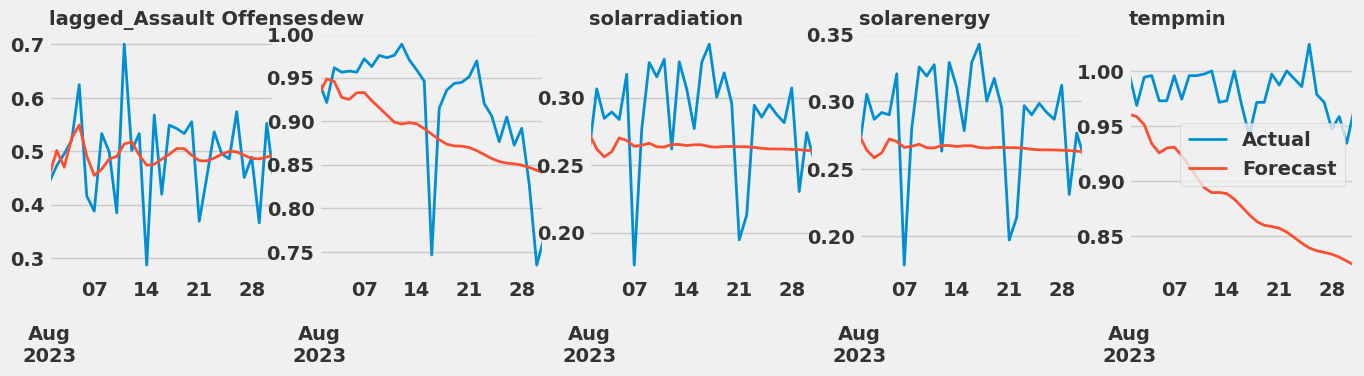

In [52]:
# Visualize actual and forecast of 'Larceny/Theft Offenses', 'lagged_solarradiation', 'lagged_solarenergy'
actual = cols_combination[0]
forecast = df_forecasts[0]

fig = plt.figure(figsize=(15, 3))
for i in range(len(actual)):
    ax = plt.subplot(1, len(actual), i+1)
    plt.title(actual[i], fontsize=14)
    # scaled_train[actual[i]][-lag_order:].plot(lw=2, ax=ax, label="Actual")
    scaled_test[actual[i]].plot(lw=2, ax=ax, label="Actual")
    forecast[forecast.columns[i]].plot(lw=2, ax=ax, label="Forecast")
    plt.xlabel("")
plt.legend();

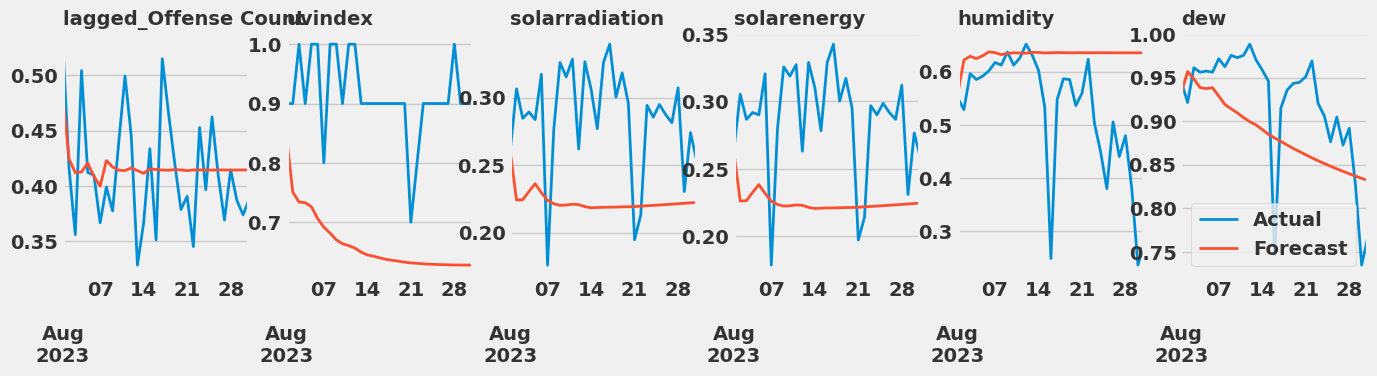

In [53]:
# Visualize actual and forecast of 'lagged_Assault Offenses', 'dew', 'uvindex'
actual = cols_combination[1]
forecast = df_forecasts[1]

fig = plt.figure(figsize=(15, 3))
for i in range(len(actual)):
    ax = plt.subplot(1, len(actual), i+1)
    plt.title(actual[i], fontsize=14)
    # scaled_train[actual[i]][-lag_order:].plot(lw=2, ax=ax, label="Actual")
    scaled_test[actual[i]].plot(lw=2, ax=ax, label="Actual")
    forecast[forecast.columns[i]].plot(lw=2, ax=ax, label="Forecast")
    plt.xlabel("")
plt.legend();

### **Evaluate Models**

In [56]:
# Evaluate models
# Get evaluation metrics, r2, mse, mape, and rmse
def evaluate_model(test, pred):
    r2 = r2_score(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    return r2, mse, rmse, mae, mape

In [57]:
# Calculate R2, MSE, MAPE, RMSE and store them in lists
data = []
R2 = []
MSE = []
RMSE = []
MAE = []
MAPE = []

for i in range(len(cols_combination)):
    actual = scaled_test[cols_combination[i]][:7]
    forecast = df_forecasts[i][:7]
    r2, mse, rmse, mae, mape = evaluate_model(actual, forecast)
    data.append(cols_combination[i])
    R2.append(r2) 
    MSE.append(mse) 
    RMSE.append(rmse)
    MAE.append(mae)
    MAPE.append(mape) 

* For 7-day forecast, Model 1 recorded the higher performance score with a MAPE of 0.090691, meaning that the Model 1 forecast is 91% accurate.
* ***Model 1 predict 'lagged_Assault Offenses', 'dew', 'solarradiation', 'solarenergy, 'tempmin'***
* Model 2 predict 'lagged_Offense Count', 'uvindex', 'solarradiation', 'solarenergy', 'humidity', 'dew'

In [59]:
evaluate_df = pd.DataFrame([data, MSE, RMSE, MAE, MAPE]).T
evaluate_df.columns = ['Data', 'MSE', 'RMSE', 'MAE', 'MAPE']
evaluate_df

,Data,MSE,RMSE,MAE,MAPE
0,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",0.001884,0.043408,0.037274,0.094234
1,"[lagged_Offense Count, uvindex, solarradiation, solarenergy, humidity, dew]",0.009125,0.095526,0.065673,0.128204


In [60]:
# Calculate R2, MSE, MAPE, RMSE and store them in lists
data = []
R2 = []
MSE = []
RMSE = []
MAE = []
MAPE = []

for i in range(len(cols_combination)):
    actual = scaled_test[cols_combination[i]][-steps:]
    forecast = df_forecasts[i]
    r2, mse, rmse, mae, mape = evaluate_model(actual, forecast)
    data.append(cols_combination[i])
    R2.append(r2) 
    MSE.append(mse) 
    RMSE.append(rmse)
    MAE.append(mae)
    MAPE.append(mape) 

* For 30-day forecast, Model 1 recorded the highest performance with a MAPE of 0.113429, meaning that the Model 1 forecast is about 89% accurate.
* ***Model 1 predict 'lagged_Assault Offenses', 'dew', 'solarradiation', 'solarenergy, 'tempmin'***
* Model 2 predict 'lagged_Offense Count', 'uvindex', 'solarradiation', 'solarenergy', 'humidity', 'dew'

In [61]:
evaluate_df = pd.DataFrame([data, MSE, RMSE, MAE, MAPE]).T
evaluate_df.columns = ['Data', 'MSE', 'RMSE', 'MAE', 'MAPE']
evaluate_df

,Data,MSE,RMSE,MAE,MAPE
0,"[lagged_Assault Offenses, dew, solarradiation, solarenergy, tempmin]",0.004935,0.07025,0.057746,0.113429
1,"[lagged_Offense Count, uvindex, solarradiation, solarenergy, humidity, dew]",0.018192,0.134876,0.097581,0.19525


### **Inverse Features**

In [62]:
# Function to unscale min-max scaled values
def unscaled_series(original_series, min_val, max_val):
    unscaled = original_series * (max_val - min_val) + min_val
    return unscaled

# Function to ragged values, first_value --> the last value in the training dataset
def restore_ragged_series(lagged_series, first_value):
    # restored = []
    restored = first_value + lagged_series.cumsum()
    return restored

* Unscale and unlag df_forecasts

In [63]:
# Unscale df_forecasts
dfs_fc_unscaled = []
actual_cols = []
for i in range(len(df_forecasts)):
    df_fc_unscaled = pd.DataFrame()
    df_fc = df_forecasts[i]
    cols = df_fc.columns

    for j in range(len(cols)):
        col = cols[j].replace("_forecast", "")
        unscaled_col = unscaled_series(df_fc[cols[j]], min_max_df.loc[col, 'minimum'], min_max_df.loc[col, 'maximum'])
        new_col_name = "restored_" + cols[j]
        df_fc_unscaled[new_col_name] = unscaled_col

        if 'lagged' in new_col_name:
            col = new_col_name.replace("restored_", "").replace("lagged_", "").replace("_forecast", "")
            df_fc_unscaled[new_col_name] = restore_ragged_series(df_fc[cols[j]], crime_df[col][-32]) # crime_df[col][-32] --> The value of 7/31/2023
        actual_cols.append(col)
    dfs_fc_unscaled.append(df_fc_unscaled)
        

* Compare Actual and Forecast
['Assault Offenses', 'dew', 'solarradiation', 'solarenergy', 'tempmin']
'Offense Count',
 'uvindex',
 'solarradiation',
 'solarenergy',
 'humidity',
 'dew'

In [64]:
dfs_fc_unscaled[0][:7]

,restored_lagged_Assault Offenses_forecast,restored_dew_forecast,restored_solarradiation_forecast,restored_solarenergy_forecast,restored_tempmin_forecast
date,,,,,
2023-08-01,173.454107,72.346082,195.151825,16.821312,79.842862
2023-08-02,173.955545,73.701657,187.330518,16.150252,79.686763
2023-08-03,174.425882,73.477972,183.333063,15.809991,79.184179
2023-08-04,174.950915,72.055744,185.901337,16.032857,77.975745
2023-08-05,175.499976,71.875196,192.907845,16.637930,77.384398
2023-08-06,175.991333,72.470727,191.621000,16.527411,77.693369
2023-08-07,176.446286,72.488534,188.612429,16.267202,77.755930


In [65]:
# Combine crime and weather data
model_1_cols = actual_cols[:len(dfs_fc_unscaled[0].columns)]

actual = pd.concat([crime_df[crime_cols], temp_df[temp_cols]], axis=1)
actual[model_1_cols].loc['2023-08-01': '2023-08-07']

,Assault Offenses,dew,solarradiation,solarenergy,tempmin
date,,,,,
2023-08-01,157.0,73.4,186.7,16.2,82.4
2023-08-02,151.0,71.6,217.7,18.6,80.4
2023-08-03,152.0,74.7,202.8,17.5,82.2
2023-08-04,161.0,74.3,206.0,17.8,82.3
2023-08-05,203.0,74.4,202.2,17.7,80.7
2023-08-06,179.0,74.3,225.1,19.5,80.7
2023-08-07,146.0,75.5,128.6,11.1,82.3


* Compare Actual and Forecast
['Assault Offenses', 'dew', 'solarradiation', 'solarenergy', 'tempmin']

In [66]:
dfs_fc_unscaled[1][:7]

,restored_lagged_Offense Count_forecast,restored_uvindex_forecast,restored_solarradiation_forecast,restored_solarenergy_forecast,restored_humidity_forecast,restored_dew_forecast
date,,,,,,
2023-08-01,607.480419,8.442536,185.964232,16.024754,63.566458,72.510271
2023-08-02,607.904827,7.506696,161.482558,13.913575,68.779744,74.366277
2023-08-03,608.316892,7.341100,161.664730,13.928390,69.354764,73.695025
2023-08-04,608.729514,7.328746,165.810307,14.297106,68.998562,72.928394
2023-08-05,609.150149,7.260449,169.737559,14.633652,69.416867,72.842350
2023-08-06,609.558806,7.062247,165.231374,14.248302,70.025412,72.918061
2023-08-07,609.958670,6.916246,161.366888,13.912577,69.911756,72.170530


In [80]:
# Combine crime and weather data
model_2_cols = actual_cols[len(dfs_fc_unscaled[0].columns):]

actual = pd.concat([crime_df[crime_cols], temp_df[temp_cols]], axis=1)
actual[model_2_cols].loc['2023-08-01': '2023-08-07']

,Offense Count,uvindex,solarradiation,solarenergy,humidity,dew
date,,,,,,
2023-08-01,702.0,9.0,186.7,16.2,63.0,73.4
2023-08-02,703.0,9.0,217.7,18.6,61.2,71.6
2023-08-03,654.0,10.0,202.8,17.5,66.7,74.7
2023-08-04,729.0,9.0,206.0,17.8,65.8,74.3
2023-08-05,727.0,10.0,202.2,17.7,66.3,74.4
2023-08-06,723.0,10.0,225.1,19.5,67.1,74.3
2023-08-07,683.0,8.0,128.6,11.1,68.4,75.5


### **Visualize August Unscaled-Unlsgged Actual and Forecast**

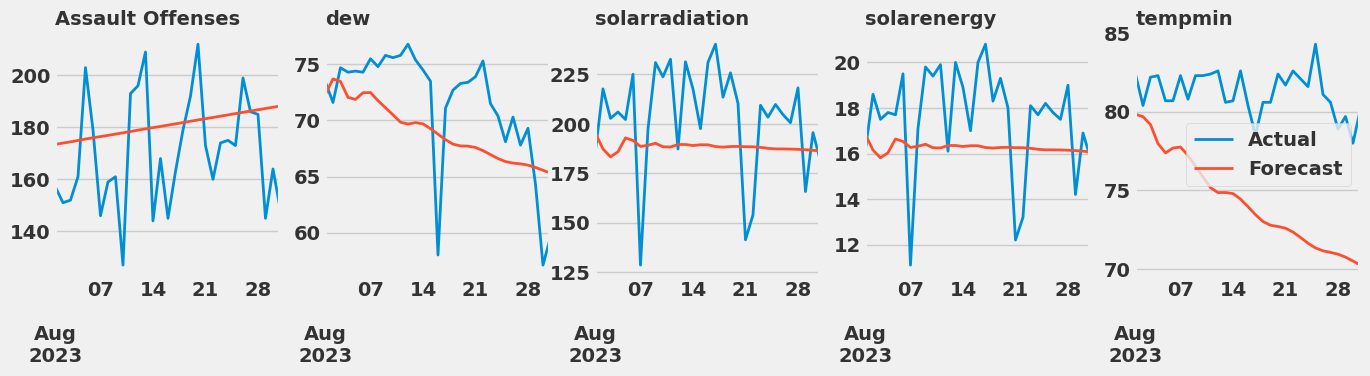

In [87]:
# Visualize actual and forecast of 'lagged_Assault Offenses', 'dew', 'uvindex'
df_actual = actual[model_1_cols].loc['2023-08-01': '2023-08-31']
df_forecast = dfs_fc_unscaled[0]

fig = plt.figure(figsize=(15, 3))
for i in range(len(df_actual.columns)):
    ax = plt.subplot(1, len(df_actual.columns), i+1)
    plt.title(df_actual.columns[i], fontsize=14)
    # scaled_train[actual[i]][-lag_order:].plot(lw=2, ax=ax, label="Actual")
    df_actual[df_actual.columns[i]].plot(lw=2, ax=ax, label="Actual")
    df_forecast[df_forecast.columns[i]].plot(lw=2, ax=ax, label="Forecast")
    plt.xlabel("")
plt.legend();

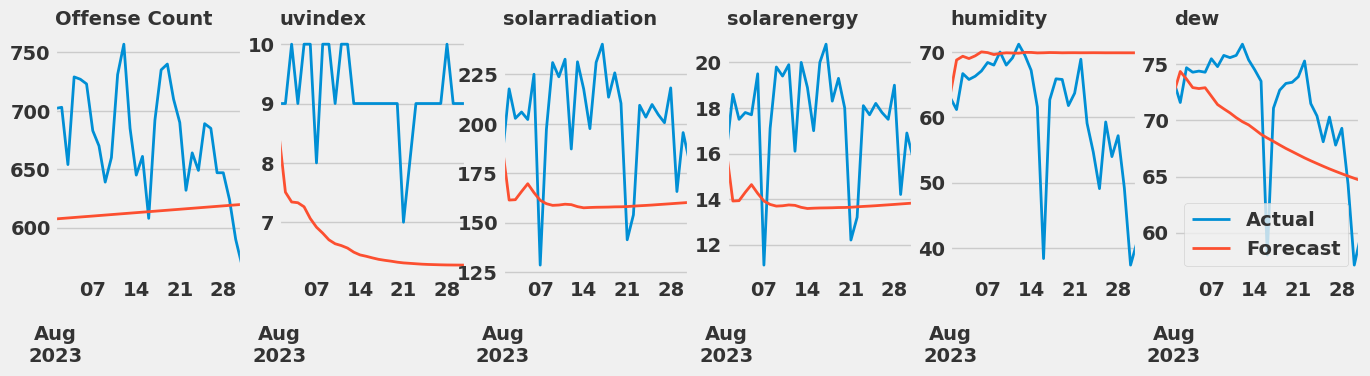

In [86]:
# Visualize actual and forecast of 'lagged_Assault Offenses', 'dew', 'uvindex'
df_actual = actual[model_2_cols].loc['2023-08-01': '2023-08-31']
df_forecast = dfs_fc_unscaled[1]

fig = plt.figure(figsize=(15, 3))
for i in range(len(df_actual.columns)):
    ax = plt.subplot(1, len(df_actual.columns), i+1)
    plt.title(df_actual.columns[i], fontsize=14)
    # scaled_train[actual[i]][-lag_order:].plot(lw=2, ax=ax, label="Actual")
    df_actual[df_actual.columns[i]].plot(lw=2, ax=ax, label="Actual")
    df_forecast[df_forecast.columns[i]].plot(lw=2, ax=ax, label="Forecast")
    plt.xlabel("")
plt.legend();

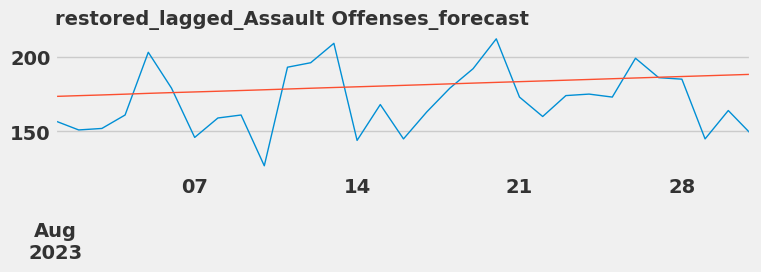

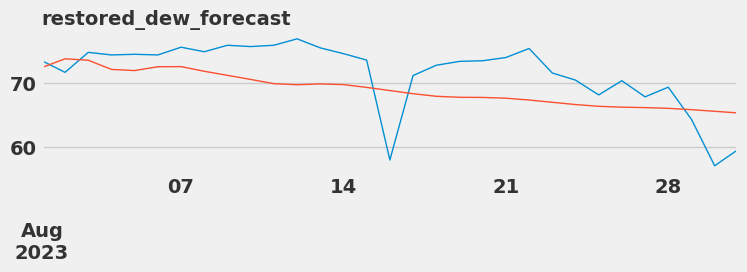

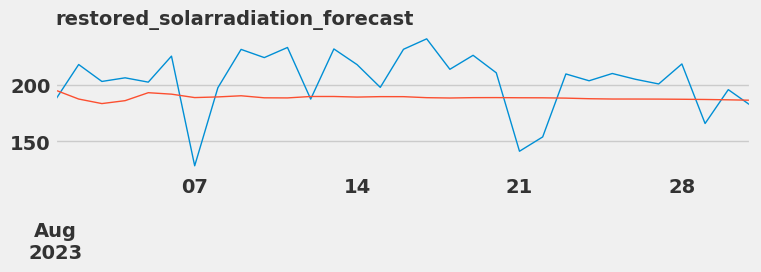

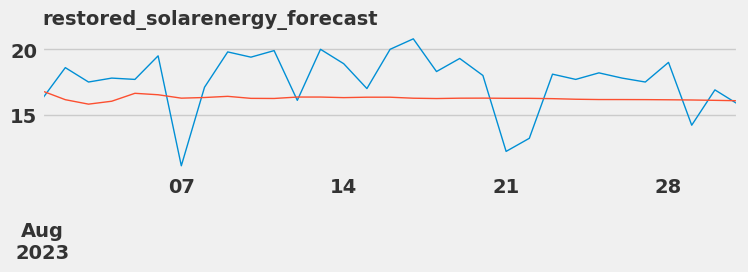

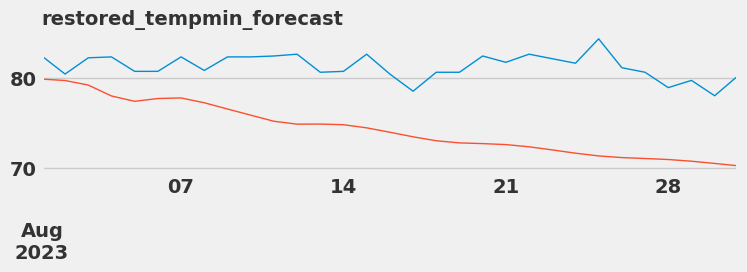

In [68]:
# Visualize actual and forecast of 'Larceny/Theft Offenses', 'lagged_solarradiation', 'lagged_solarenergy'
# forecast = dfs_fc_unscaled_31[0]
df_forecast = dfs_fc_unscaled[0]
df_actual = actual[model_1_cols].loc['2023-08-01': '2023-08-31']
cols = df_forecast.columns

for i in range(len(cols)):
    fig = plt.figure(figsize=(8, 10))
    ax = plt.subplot(len(cols), 1, i+1)
    plt.title(cols[i], fontsize=14)
    df_actual[model_1_cols[i]].plot(lw=1, ax=ax, label="Actual")
    df_forecast[cols[i]].plot(lw=1, ax=ax, label="Forecast")
    if i != len(cols):
        plt.xlabel("")
    plt.legend("", frameon=False)

KeyError: 'lagged_Offense Count_forecast'

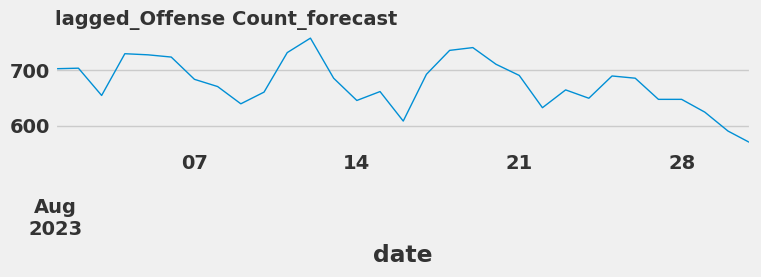

In [69]:
# Visualize actual and forecast of 'Larceny/Theft Offenses', 'lagged_solarradiation', 'lagged_solarenergy'
# forecast = dfs_fc_unscaled_31[0]
df_forecast = dfs_fc_unscaled[1]
df_actual = actual[model_2_cols].loc['2023-08-01': '2023-08-31']
cols = forecast.columns

for i in range(len(cols)):
    fig = plt.figure(figsize=(8, 10))
    ax = plt.subplot(len(cols), 1, i+1)
    plt.title(cols[i], fontsize=14)
    df_actual[model_2_cols[i]].plot(lw=1, ax=ax, label="Actual")
    df_forecast[cols[i]].plot(lw=1, ax=ax, label="Forecast")
    if i != len(cols):
        plt.xlabel("")
    plt.legend("", frameon=False)